# Análise das OS do HUCAM - jan 2018 a jul 2020
Maiky Barreto da Silva

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn
pd.set_option('display.max_rows',15)

seaborn.set()

Importanto e tratando as tabelas

In [12]:
dfOS_t = pd.read_excel('excel/CodificacoesHUCAM.xlsx', 2, skiprows=5)
dfOS_t

,Unid. Saúde,Núm.Orgão,Classe,Núm. O.S.,Abertura,Encerramento,Patrimônio,N. Série,Tipo Equip.,Marca,Modelo,Grupo,Duração (dias),Duração (horas),Programa MP,Equipamento Crítico,Código,Patrimônio Ref.,Erro,Faixa de Duração
0,HUCAM,NaN,Manutenção Corretiva,17.6759,2017-01-02 07:00:00.000,2017-01-02 13:01:00.000,0624/156945,NaN,MONITOR FISIOLOGICO MULTIUSO,DIXTAL,DX-2010,NaN,NaN,NaN,NaN,NaN,UPF,0624/156945,0,1
1,HUCAM,1.11.3.1.13,Manutenção Corretiva,17.6761,2017-01-02 14:25:00.000,2017-01-02 15:15:00.000,0282/155112,NaN,AUTOCLAVE GRANDE PORTE,ORTOSINTESE,AC-523-UNIVERSAL,NaN,NaN,NaN,NaN,NaN,ACC,0282/155112,0,1
2,HUCAM,1.11.3.1.13,Manutenção Corretiva,17.6762,2017-01-02 14:44:00.000,2017-01-02 15:45:00.000,0283/155111,NaN,AUTOCLAVE GRANDE PORTE,ORTOSINTESE,AC-523-UNIVERSAL,NaN,NaN,NaN,NaN,NaN,ACC,0283/155111,0,1
3,HUCAM,1.11.3.1.14,Manutenção Corretiva,17.6764,2017-01-02 15:00:00.000,2017-01-02 16:05:00.000,0956/170929,NaN,VENTILADOR UTI,INTERMED,INTER-7-PLUS,NaN,NaN,NaN,NaN,NaN,NPF,0956/170929,0,1
4,HUCAM,NaN,Manutenção Corretiva,17.6772,2017-01-04 08:00:00.000,2017-01-04 10:35:00.000,0393/174105,NaN,CAMA ELETRICA,LINET SPOL,1-SMA-7945,NaN,NaN,NaN,NaN,NaN,UPF,0393/174105,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13569,HUCAM,1.11.2.7.2A,Manutenção Preventiva,20.2711,2020-06-01 12:32:48.475,2020-07-27 17:28:48.974,1956/175110,160429569040003,UNI DESCONTAMINACAO,VECO,UD-600,SECLIN,56.0,1348.0,VALIDAÇÃO / CERTIFICAÇÃO,NÃO,HF,1956/175110,0,6
13570,HUCAM,1.11.3.1.7,Manutenção Preventiva,20.2572,2020-05-20 16:01:51.153,2020-07-24 15:19:29.121,1951/175119,160429569010001,UNI DESCONTAMINACAO,BERLINERLUFT,BBF-315 4,SECLIN,64.0,1559.0,VALIDAÇÃO / CERTIFICAÇÃO,NÃO,NPF,1951/175119,0,6
13571,HUCAM,1.11.3.1.7,Manutenção Preventiva,20.2584,2020-05-21 16:25:55.019,2020-07-17 17:18:02.039,1949/175112,160429569020001,UNI DESCONTAMINACAO,BERLINERLUFT,BBF-315 4,SECLIN,57.0,1368.0,VALIDAÇÃO / CERTIFICAÇÃO,NÃO,NPF,1949/175112,0,6
13572,HUCAM,1.11.3.1.7,Manutenção Preventiva,20.2712,2020-06-01 12:42:23.664,2020-07-27 17:26:12.614,1950/175120,160429569010002,UNI DESCONTAMINACAO,BERLINERLUFT,BBF-315 4,SECLIN,56.0,1348.0,VALIDAÇÃO / CERTIFICAÇÃO,NÃO,NPF,1950/175120,0,6


In [13]:
dfInv_t = pd.read_excel('excel/CodificacoesHUCAM.xlsx', 3, skiprows=2)
dfInv_t

,U.S.,Orgão,Localização,Patrimônio,N.º Série,Tipo Equipamento,Classe,Marca,Modelo,Fornecedor,...,Q. Falhas 365,Ativo 365,Se Falhou 365,Q. Falhas 1080,Ativo 1080,Se Falhou 1080,Q. Falhas 10a,Ativo 10a,Se Falhou 10a,Quantidade de Falhas ISUB
0,HUCAM,NaN,NaN,ACC/001,NaN,BLENDER,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,HUCAM,NaN,NaN,ACC/002,NaN,BRACADEIRA,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,HUCAM,NaN,NaN,ACC/003,NaN,CABO FIBRA OPTICA,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,HUCAM,NaN,NaN,ACC/004,NaN,CABO FORCA,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,HUCAM,NaN,NaN,ACC/005,NaN,CABO-TERMINAL ECG,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,HUCAM,CENTRAL DE EQUIPAMENTOS DA ENGENHARIA CLÍNICA,NaN,2982/507511,0527415,ESFIGMOMANOMETRO ANEROIDE,Equipamento,WENZHOU KANGJU,HOSPITALAR PAREDE,FISIOMEDICA PRODUTOS E EQUIPAMENTOS LTDA ME,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2551,HUCAM,UNIDADE DE TERAPIA INTENSIVA NEONATAL,NaN,2984/NT,NaN,OFTALMOSCOPIO,Equipamento,WELCH ALLYN,13010,DESCONHECIDO,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2552,HUCAM,AMBULATÓRIO - CASA 3 (CARDIOLOGIA / ENDOSCOPIA...,NaN,2985/NT,1982021,ESTEIRA ERGOMETRICA,Equipamento,MICROMED,CENTURION-300,DESCONHECIDO,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2553,HUCAM,UNIDADE DE TERAPIA INTENSIVA NEONATAL,NaN,2986/NT,NaN,OFTALMOSCOPIO,Equipamento,WELCH ALLYN,13010,DESCONHECIDO,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [14]:
dfOS_t.columns

Index(['Unid. Saúde', 'Núm.Orgão', 'Classe', 'Núm. O.S.', 'Abertura',
       'Encerramento', 'Patrimônio', 'N. Série', 'Tipo Equip.', 'Marca',
       'Modelo', 'Grupo', 'Duração (dias)', 'Duração (horas)', 'Programa MP',
       'Equipamento Crítico', 'Código', 'Patrimônio Ref.', 'Erro',
       'Faixa de Duração'],
      dtype='object')

In [20]:
dfOS = dfOS_t.loc[:,['Núm.Orgão','Classe','Núm. O.S.','Abertura','Encerramento','Patrimônio', 'Tipo Equip.','Marca','Programa MP', 'Equipamento Crítico', 'Código']]
dfOS

,Núm.Orgão,Classe,Núm. O.S.,Abertura,Encerramento,Patrimônio,Tipo Equip.,Marca,Programa MP,Equipamento Crítico,Código
0,NaN,Manutenção Corretiva,17.6759,2017-01-02 07:00:00.000,2017-01-02 13:01:00.000,0624/156945,MONITOR FISIOLOGICO MULTIUSO,DIXTAL,NaN,NaN,UPF
1,1.11.3.1.13,Manutenção Corretiva,17.6761,2017-01-02 14:25:00.000,2017-01-02 15:15:00.000,0282/155112,AUTOCLAVE GRANDE PORTE,ORTOSINTESE,NaN,NaN,ACC
2,1.11.3.1.13,Manutenção Corretiva,17.6762,2017-01-02 14:44:00.000,2017-01-02 15:45:00.000,0283/155111,AUTOCLAVE GRANDE PORTE,ORTOSINTESE,NaN,NaN,ACC
3,1.11.3.1.14,Manutenção Corretiva,17.6764,2017-01-02 15:00:00.000,2017-01-02 16:05:00.000,0956/170929,VENTILADOR UTI,INTERMED,NaN,NaN,NPF
4,NaN,Manutenção Corretiva,17.6772,2017-01-04 08:00:00.000,2017-01-04 10:35:00.000,0393/174105,CAMA ELETRICA,LINET SPOL,NaN,NaN,UPF
...,...,...,...,...,...,...,...,...,...,...,...
13569,1.11.2.7.2A,Manutenção Preventiva,20.2711,2020-06-01 12:32:48.475,2020-07-27 17:28:48.974,1956/175110,UNI DESCONTAMINACAO,VECO,VALIDAÇÃO / CERTIFICAÇÃO,NÃO,HF
13570,1.11.3.1.7,Manutenção Preventiva,20.2572,2020-05-20 16:01:51.153,2020-07-24 15:19:29.121,1951/175119,UNI DESCONTAMINACAO,BERLINERLUFT,VALIDAÇÃO / CERTIFICAÇÃO,NÃO,NPF
13571,1.11.3.1.7,Manutenção Preventiva,20.2584,2020-05-21 16:25:55.019,2020-07-17 17:18:02.039,1949/175112,UNI DESCONTAMINACAO,BERLINERLUFT,VALIDAÇÃO / CERTIFICAÇÃO,NÃO,NPF
13572,1.11.3.1.7,Manutenção Preventiva,20.2712,2020-06-01 12:42:23.664,2020-07-27 17:26:12.614,1950/175120,UNI DESCONTAMINACAO,BERLINERLUFT,VALIDAÇÃO / CERTIFICAÇÃO,NÃO,NPF


In [36]:
dfInv_t.columns[1:30]
# As colunas após estas apenas interferem na memória consumida

Index(['Orgão', 'Localização', 'Patrimônio', 'N.º Série', 'Tipo Equipamento',
       'Classe', 'Marca', 'Modelo', 'Fornecedor', 'Valor (R$)', 'Aquisição',
       'Núm. Doc. da Aquisição', 'Nota Fiscal', 'Garantia', 'Data Desativação',
       'Desativado', 'Parecer Desativação', 'Permitir O.S.', 'Baixado',
       'Contrato', 'NEC', 'Equipamento Crítico', 'N.º Quebras',
       'N.º Serviço Externo', 'N.º Peças Utilizadas',
       'Custo Serviço Externo (R$)', 'Custo Peça (R$)', 'Vida Útil',
       'Descrição Complementar'],
      dtype='object')

In [37]:
dfInv = dfInv_t.loc[:, ['Patrimônio', 'Data Desativação', 'Desativado']] 
dfInv

,Patrimônio,Data Desativação,Desativado
0,ACC/001,NaT,NaN
1,ACC/002,NaT,NaN
2,ACC/003,NaT,NaN
3,ACC/004,NaT,NaN
4,ACC/005,NaT,NaN
...,...,...,...
2550,2982/507511,NaT,NÃO
2551,2984/NT,NaT,NÃO
2552,2985/NT,NaT,NÃO
2553,2986/NT,NaT,NÃO


In [38]:
del dfOS_t
del dfInv_t

In [51]:
df = dfOS.merge(dfInv, on='Patrimônio')
df

,Núm.Orgão,Classe,Núm. O.S.,Abertura,Encerramento,Patrimônio,Tipo Equip.,Marca,Programa MP,Equipamento Crítico,Código,Data Desativação,Desativado
0,NaN,Manutenção Corretiva,17.6759,2017-01-02 07:00:00.000,2017-01-02 13:01:00.000,0624/156945,MONITOR FISIOLOGICO MULTIUSO,DIXTAL,NaN,NaN,UPF,NaT,NÃO
1,NaN,Manutenção Corretiva,17.7343,2017-02-16 10:46:00.000,2017-02-16 12:20:00.000,0624/156945,MONITOR FISIOLOGICO MULTIUSO,DIXTAL,NaN,NaN,NPF,NaT,NÃO
2,NaN,Manutenção Preventiva,17.7415,2017-02-21 07:50:00.000,2017-02-21 08:35:00.000,0624/156945,MONITOR FISIOLOGICO MULTIUSO,DIXTAL,NaN,NaN,NPF,NaT,NÃO
3,NaN,Manutenção Corretiva,17.8721,2017-06-12 08:16:00.000,2017-06-12 10:00:00.000,0624/156945,MONITOR FISIOLOGICO MULTIUSO,DIXTAL,NaN,NaN,ACC,NaT,NÃO
4,NaN,Manutenção Corretiva,17.9835,2017-09-26 08:28:00.000,2017-09-26 11:00:00.000,0624/156945,MONITOR FISIOLOGICO MULTIUSO,DIXTAL,NaN,NaN,UPF,NaT,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13522,1.11.3.1.7,Manutenção Preventiva,20.4072,2020-07-23 18:16:14.151,2020-07-24 09:37:14.832,2959/NT,CAMA ELETRICA,RC MOVEIS,TREINAMENTO,NÃO,NCA,NaT,NÃO
13523,1.11.3.1.7,Manutenção Preventiva,20.4071,2020-07-23 18:13:09.162,2020-07-24 09:36:02.003,2960/NT,CAMA ELETRICA,RC MOVEIS,TREINAMENTO,NÃO,NCA,NaT,NÃO
13524,1.11.3.1.7,Manutenção Preventiva,20.4001,2020-07-21 18:15:57.135,2020-07-22 18:14:28.067,2949/NR,CAMA ELETRICA,RC MOVEIS,TREINAMENTO,NÃO,NCA,NaT,NÃO
13525,1.11.3.1.7,Manutenção Preventiva,20.4050,2020-07-22 16:54:34.069,2020-07-28 09:09:49.935,2951/NT,CAMA ELETRICA,RC MOVEIS,TREINAMENTO,NÃO,NCA,NaT,NÃO


Verificando os códigos de cada tipo de equipamento

In [67]:
lista_equip = df['Tipo Equip.'].drop_duplicates().sort_values().reset_index(drop=True)
lista_equip
# Para ver a lista completa utilize o leitor de variáveis do Notebook

0                    ACIONADOR-CHAVE
1                       AGITADOR LAB
2                     ALCA RESSECCAO
3      ANA LAB HEM CTG CELULA MANUAL
4      AQUECEDOR PACIENTE AR FORCADO
                   ...              
226               VIDEO COLONOSCOPIO
227                VIDEO COLPOSCOPIO
228              VIDEO DUODENOSCOPIO
229      VIDEO GASTROSCOPIO FLEXIVEL
230                      WORKSTATION
Name: Tipo Equip., Length: 231, dtype: object

In [103]:
equip = lista_equip[142] #usar índice de lista_equip
dfCod = df[df['Tipo Equip.'].isin([equip])]
tabela_classe = dfCod.pivot_table('Tipo Equip.', 'Código', 'Classe', aggfunc='count')
tabela_MC = tabela_classe.iloc[:,0].dropna()
tabela_MP = tabela_classe.iloc[:,1].dropna()

[Text(0, 0.5, 'Quantidade de OS fechadas'),
 Text(0.5, 1.0, 'Manutenções Preventivas')]

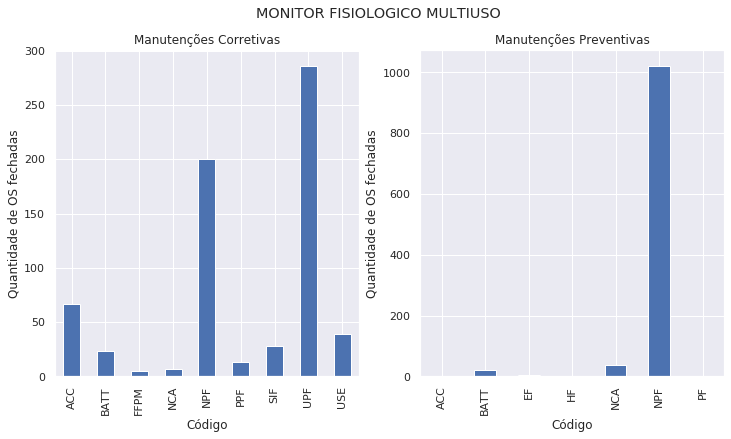

In [114]:
fig1 = plt.figure(figsize=(12,6))
fig1.suptitle(equip)
ax11 = plt.subplot(121)
ax11 = tabela_MC.plot.bar()
ax11.set(title = 'Manutenções Corretivas', ylabel = 'Quantidade de OS fechadas')
ax12 = plt.subplot(122)
ax12 = tabela_MP.plot.bar()
ax12.set(TITLE = 'Manutenções Preventivas', ylabel = 'Quantidade de OS fechadas')